<a href="https://colab.research.google.com/github/notmylove/blogs/blob/master/tensorflow_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip \
    -O /tmp/horse-or-human.zip

--2019-03-21 13:09:47--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 2404:6800:4008:c04::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/tmp/horse-or-human.zip’

/tmp/horse-or-human 100%[===================>] 142.65M  56.7MB/s    in 2.5s    

2019-03-21 13:09:50 (56.7 MB/s) - ‘/tmp/horse-or-human.zip’ saved [149574867/149574867]



In [0]:
import os
import zipfile

zip_ref = zipfile.ZipFile('/tmp/horse-or-human.zip', 'r')
zip_ref.extractall('/tmp/horse-or-human')
zip_ref.close()



 **Later you'll see something called an ImageGenerator being used -- and this is coded to read images from subdirectories, and automatically label them from the name of that subdirectory**

In [12]:
train_horse_dir = os.path.join('/tmp/horse-or-human/horses')
train_human_dir = os.path.join('/tmp/horse-or-human/humans')
print(os.listdir(train_horse_dir)[:10])
train_horse_names = os.listdir(train_horse_dir)
train_human_names =os.listdir(train_human_dir)

['horse30-9.png', 'horse30-5.png', 'horse32-7.png', 'horse33-0.png', 'horse34-5.png', 'horse06-3.png', 'horse16-1.png', 'horse09-9.png', 'horse17-1.png', 'horse44-8.png']


In [0]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [0]:
nrows = 4
ncols = 4
img_index = 0

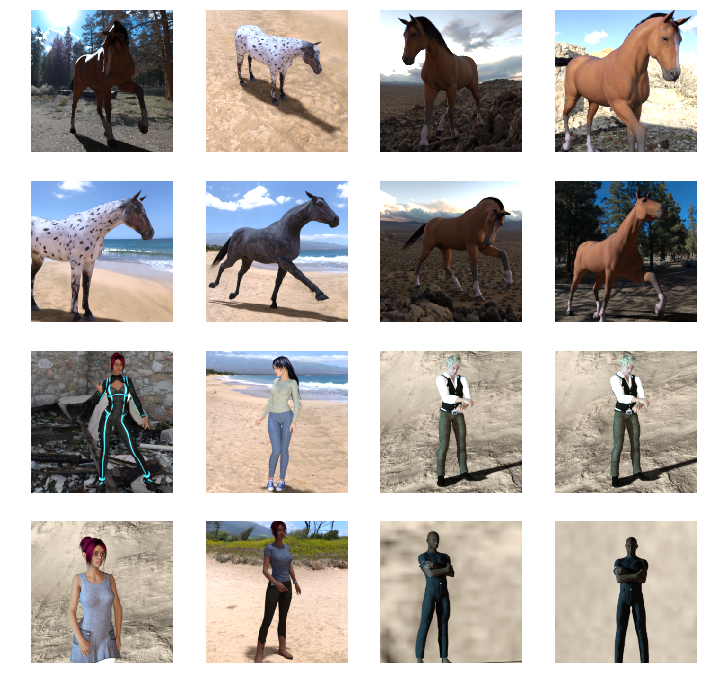

In [29]:
fig = plt.gcf()
fig.set_size_inches(nrows * 3, ncols * 3)

img_index += 8
next_horse_img = [os.path.join('/tmp/horse-or-human/horses', path) for path in train_horse_names[img_index-8:img_index]]
next_human_img = [os.path.join('/tmp/horse-or-human/humans', path) for path in train_human_names[img_index-8:img_index]]

for i, j in enumerate(next_horse_img + next_human_img):
  ax = plt.subplot(nrows, ncols, i+1)
  ax.axis('off')
  img = mpimg.imread(j)
  plt.imshow(img)

In [0]:
构造CNN模型

In [0]:
import tensorflow as tf
from tensorflow import keras

In [19]:
model = tf.keras.models.Sequential([
    keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(300, 300, 3)),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D(2, 2),
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 71, 71, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 35, 35, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 33, 33, 64)        36928     
__________

In [0]:
from tensorflow.keras.optimizers import RMSprop

In [0]:
model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])

## Data Preprocessing


As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the [0, 1] range (originally all values are in the [0, 255] range).

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [13]:
train_generator = ImageDataGenerator(rescale=1/255.0).flow_from_directory(
    '/tmp/horse-or-human/',
    target_size= (300, 300),
    batch_size = 128,
    class_mode = 'binary')

Found 1027 images belonging to 2 classes.


## training

In [0]:
history = model.fit_generator(
    train_generator,
    epochs = 15,
    steps_per_epoch = 8,
    verbose = 1)

## Running the Model

In [0]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
  path = '/content/' + fn
  img = image.load_img(path, target_size=(300, 300))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")
   